In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
file=files.upload()

Saving index.csv to index (1).csv


In [ ]:
data=pd.read_csv('index.csv')
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
data.fillna(0,inplace=True)
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
data.shape

(1133, 6)

In [ ]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
X=data.groupby('date')['coffee_name'].value_counts().reset_index(name='count')
X.head(10)

,date,coffee_name,count
0,2024-03-01,Americano with Milk,4
1,2024-03-01,Hot Chocolate,3
2,2024-03-01,Latte,2
3,2024-03-01,Americano,1
4,2024-03-01,Cocoa,1
5,2024-03-02,Americano,3
6,2024-03-02,Americano with Milk,3
7,2024-03-02,Latte,1
8,2024-03-03,Americano with Milk,2
9,2024-03-03,Cortado,2


In [ ]:


daily_sales = data.groupby(data['date'])['money'].sum()
daily_sales

,money
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2024-07-27,372.76
2024-07-28,78.86
2024-07-29,321.82


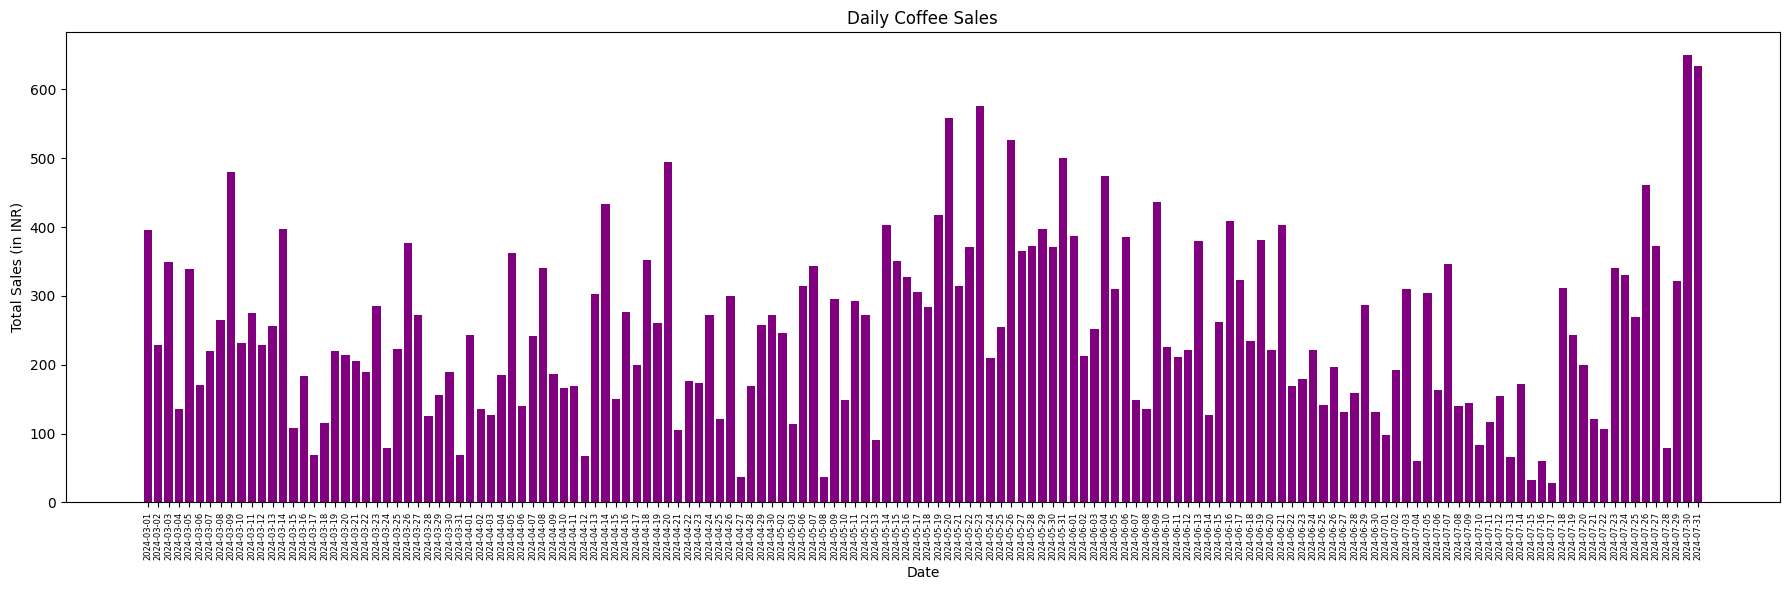

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(daily_sales.index, daily_sales.values, color='purple')
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (in INR)')
plt.xticks(rotation=90,fontsize=6)
plt.tight_layout()
plt.show()

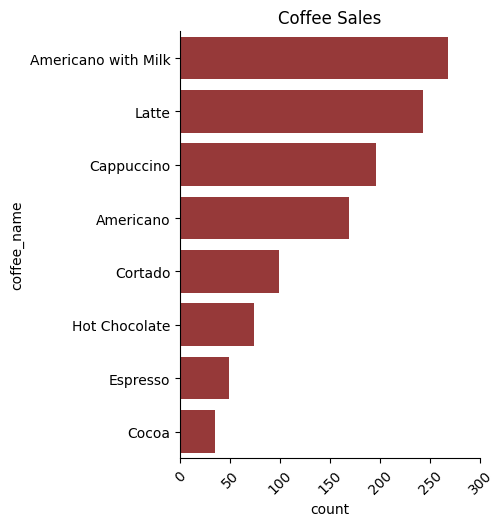

In [ ]:
sns.catplot(data['coffee_name'],color='brown',kind='count',order=data['coffee_name'].value_counts().index)
plt.title('Coffee Sales')
plt.xticks(rotation=45)
plt.xlim(0,300)

plt.show()

In [ ]:
coffee_sales=data.groupby('coffee_name')['money'].sum()
coffee_sales

,money
coffee_name,
Americano,4644.54
Americano with Milk,8601.94
Cappuccino,7333.14
Cocoa,1295.94
Cortado,2745.08
Espresso,1100.62
Hot Chocolate,2778.48
Latte,9009.14


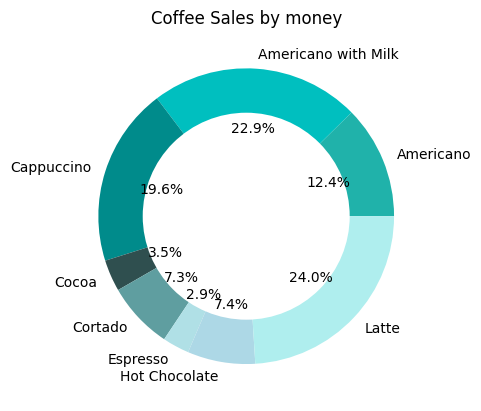

In [ ]:
coffee_sales=data.groupby('coffee_name')['money'].sum()
colors = ['lightseagreen','c','darkcyan','darkslategray','cadetblue','powderblue','lightblue','paleturquoise']
plt.pie(coffee_sales.values,labels=coffee_sales.index,autopct='%1.1f%%',colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Coffee Sales by money')
plt.show()

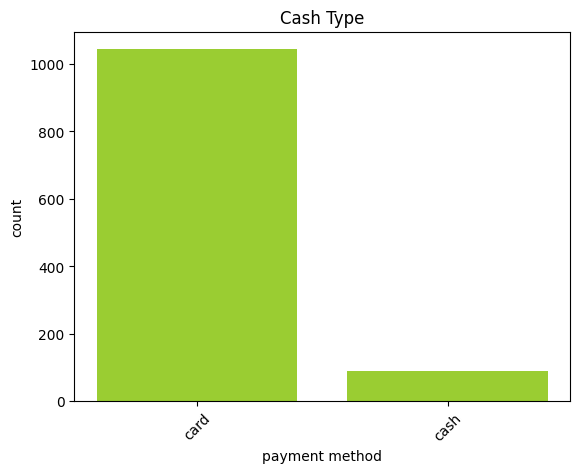

In [ ]:
plt.bar(data['cash_type'].value_counts().index,data['cash_type'].value_counts().values,color='yellowgreen')
plt.title('Cash Type')
plt.xlabel('payment method')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()